# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## 0.1 Introduction
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

### 0.2 Research question

Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?



### 0.3 About the dataset
Data source: https://data.london.gov.uk/dataset/uk-house-price-index

Detailed notes:
https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index

The UK House Price Index (HPI) captures the change in the value of residential properties
It appears that they use data on transacted properties and apply hedonic regresssion and mix-adjustment techniques to account for heterogeneity in housing stock composition, then calculate an average housing price.

For the UK HPI, standard average hoouse price is calculated by taking Jan 2015 geometric mean and recalculating it in accordance with the index change back in time, and also forward to the present day.

A 3 month moving average is applied to estimates below the regional level.

In the 'Average Price' sheet there are monthly reportings spanning Jan 1995 - March 2021


### 0.4 Approach

1. Review the data quality and conduct any cleaning that is necessary
2. Create yearly average prices for each Borough
3. Calculate the difference between years 2000 and 2020, and determine which Borough saw the largest increase




## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt # Visualization

In [4]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, 
# and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [6]:

print(properties.info()) # Check data types and NAs
print(" ")
print(properties.head(4))# Initial view of dataset
print(" ") 
print(properties.iloc[1:4, [34, 37, 47]]) # Inspect null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            315 non-null    datetime64[ns]
 1   City of London        316 non-null    object        
 2   Barking & Dagenham    316 non-null    object        
 3   Barnet                316 non-null    object        
 4   Bexley                316 non-null    object        
 5   Brent                 316 non-null    object        
 6   Bromley               316 non-null    object        
 7   Camden                316 non-null    object        
 8   Croydon               316 non-null    object        
 9   Ealing                316 non-null    object        
 10  Enfield               316 non-null    object        
 11  Greenwich             316 non-null    object        
 12  Hackney               316 non-null    object        
 13  Hammersmith & Fulham

### Dataset description



**Boroughs**
We are only interested in the boroughs of london, of which there are 32 total
This data set contains 49 columns:
- 1x dates + 3x null = exclude 4 columns = 45 remaining, too many
- 13 named columns are extra

It appears that columns 2 - 33 are the London Boroughs (names found in the Wikipedia list)
The remaining named columns correspond to aggregate measures for regions


- First row appears to be some type of identification code. This could be removed and stored separately
  - E09000002 to E09000033, E09000001 = City of London

**Data types**
Column 0 = datetime
Other named columns = Object (text or mixed numeric and non-numeric values)







**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [9]:
# Check column names
col_names = properties.columns 
print(col_names)

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')


In [10]:
# Rename column 0 (dates) as 'Month'
properties.rename(columns = {'Unnamed: 0': 'Month'}, inplace = True)

# Check updated column names
col_names = properties.columns
print(col_names)

Index(['Month', 'City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')


In [11]:
# Assign the Boroughs subset of the data
Boroughs = properties.columns[2:34]

# Non-boroughs, grouped into categories
London = ['City of London', 'Inner London', 'Outer London']
Regions = ['NORTH EAST', 'NORTH WEST','YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
           'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST']
England = ['England']


In [12]:
# Check row index
top = properties.head()
list(top.index)

[0, 1, 2, 3, 4]

In [13]:
#save column ID and then drop ID row from dataframe
col_id = properties.iloc[0, :]
properties = properties.drop([0])
properties.head(3)

,Month,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

*Note: This dataset is already in Tidy format*

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [14]:
# Change price column formats
prices = col_names.delete(0) # create list of columns containing housing prices (exclude Month)
properties[prices] = properties[prices].astype(float, errors= 'raise') #change data type to float
properties.info() #check that Dtype was changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1 to 315
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 315 non-null    datetime64[ns]
 1   City of London        315 non-null    float64       
 2   Barking & Dagenham    315 non-null    float64       
 3   Barnet                315 non-null    float64       
 4   Bexley                315 non-null    float64       
 5   Brent                 315 non-null    float64       
 6   Bromley               315 non-null    float64       
 7   Camden                315 non-null    float64       
 8   Croydon               315 non-null    float64       
 9   Ealing                315 non-null    float64       
 10  Enfield               315 non-null    float64       
 11  Greenwich             315 non-null    float64       
 12  Hackney               315 non-null    float64       
 13  Hammersmith & Fulham

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 


In [15]:
## Check for zeroes in the dataset
properties[prices].astype(bool).sum(axis=0) # count number of  non-zero values for each column

City of London          315
Barking & Dagenham      315
Barnet                  315
Bexley                  315
Brent                   315
Bromley                 315
Camden                  315
Croydon                 315
Ealing                  315
Enfield                 315
Greenwich               315
Hackney                 315
Hammersmith & Fulham    315
Haringey                315
Harrow                  315
Havering                315
Hillingdon              315
Hounslow                315
Islington               315
Kensington & Chelsea    315
Kingston upon Thames    315
Lambeth                 315
Lewisham                315
Merton                  315
Newham                  315
Redbridge               315
Richmond upon Thames    315
Southwark               315
Sutton                  315
Tower Hamlets           315
Waltham Forest          315
Wandsworth              315
Westminster             315
Unnamed: 34             315
Inner London            315
Outer London        

In [17]:
duplicates = properties[properties.duplicated()] # select duplicate rows
print('Number of duplicate rows:')
print(len(duplicates)) # count number of duplicate rows


Number of duplicate rows
0


**2.5 Data quality review**

- Null values: none
- Non-zeroes: none
- Duplicates: none

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?


*Approach*

Here I need to select one borough and plot the price values vs the 'Month' timeseries, do I have any examples of plotting timeseries?

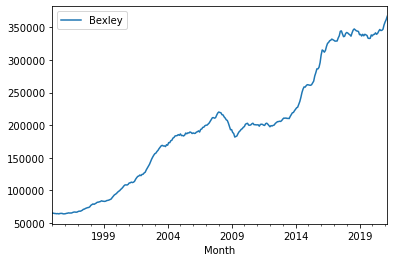

In [18]:
# Plot a single borough time series
ax = plt.gca()
properties.plot(kind = 'line', x='Month', y='Bexley', ax=ax)
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [ ]:
properties = properties.set_index('Month') # Set date to index

In [33]:
annual_mean = properties[Boroughs].resample('A').mean() #Calculate mean price for each year
annual_mean.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Month,,,,,,,,,,,,,,,,,,,,,
1995-12-31,51817.969390,91792.537433,64291.532845,73029.841840,81967.316732,120367.431783,68923.340845,81218.674792,71984.234888,63389.786578,...,80500.752648,54574.226405,72580.490579,109892.274008,64260.053745,70291.304638,63652.446010,61279.980463,88829.083075,133689.233033
1996-12-31,51718.192690,94000.445448,65490.417234,75235.918367,83547.483632,133810.487933,69713.920086,83389.914491,74062.012957,65186.781770,...,83999.034578,55747.012583,75358.658939,117307.882658,70117.306851,71651.920030,70094.724437,62177.237897,92270.037989,139188.760342
1997-12-31,55974.262309,106883.185546,70789.406603,86749.070663,94224.688035,150142.901208,77674.269967,97805.824543,83609.439219,72067.770377,...,95699.209073,60971.380317,83371.972795,136656.271017,79725.850140,81094.119743,85759.562757,68228.785835,108108.356495,165447.591208
1998-12-31,60285.821083,122359.468033,80632.020822,100692.590417,108286.520467,170688.973933,88143.228830,111343.154650,93030.224322,81532.933366,...,108049.855117,67671.270763,94514.395822,162956.066025,91405.187779,92087.045921,96505.166407,75557.474132,125406.807233,190531.949942
1999-12-31,65320.934441,136004.512067,86777.715903,112157.469808,120874.179567,191090.697392,97173.322854,126278.342342,101986.993642,90879.131712,...,121901.372575,74525.568363,102940.450633,181772.319642,110267.545583,100869.813722,113035.289367,83821.587936,145339.809767,214042.702508


In [34]:
#Select years of interest, using 2020 as the most recently completed year
y2000 = annual_mean.loc['2000']
y2020 = annual_mean.loc['2020']

# Reset index (from date to number)
y2000 = y2000.reset_index(drop=True)
y2020 = y2020.reset_index(drop=True)

#Calculate change in price
change2020 = y2020-y2000


In [35]:
# Transpose dataframe
tp2020= change2020.transpose()
tp2020.reset_index(inplace=True) #Change Boroughs from index to column, reset index
tp2020.columns = ['Borough', 'Price change'] # Name columns
tp2020.head()

,Borough,Price change
0,Barking & Dagenham,224649.638385
1,Barnet,358007.196058
2,Bexley,240055.382649
3,Brent,344751.009125
4,Bromley,287282.528592


In [36]:
# Sort by change in price, descending order
tp2020 = tp2020.sort_values(by = 'Price change', ascending=False)
print('Greatest increase in price')
print(tp2020.head()) #View greatest increase, ranked




Greatest increase in price
                 Borough   Price change
18  Kensington & Chelsea  949969.382983
31           Westminster  699630.055383
5                 Camden  584129.596175
11  Hammersmith & Fulham  480686.915450
17             Islington  470294.050875


In [37]:
print('Least increase in price') # View smallest increase
print(tp2020.tail())

Least increase in price
               Borough   Price change
14            Havering  260958.486600
6              Croydon  256348.267117
27              Sutton  252503.623650
2               Bexley  240055.382649
0   Barking & Dagenham  224649.638385


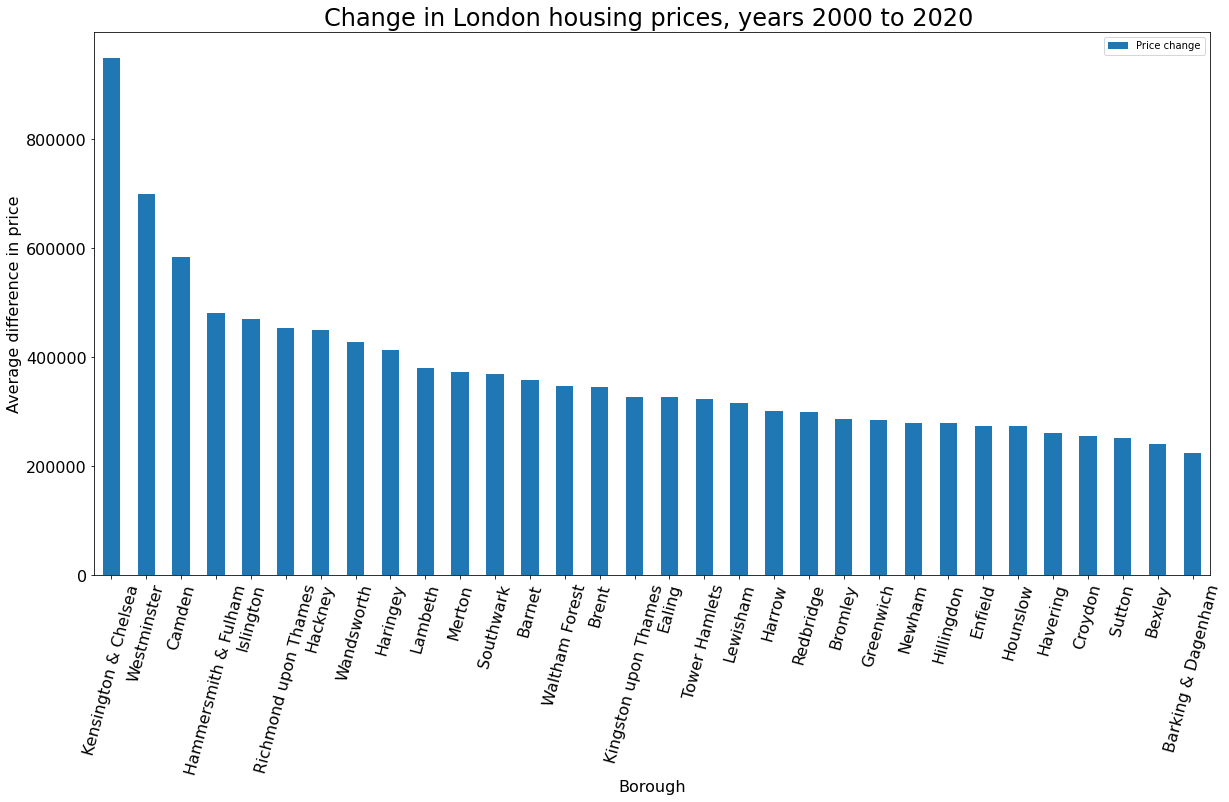

In [39]:
# Visualize the change in housing price
plt.rcParams["figure.figsize"] = (20,10)
tp2020.plot(kind = 'bar', x='Borough', y='Price change', fontsize=16, rot= 75)
plt.xlabel('Borough')
plt.ylabel('Average difference in price')
plt.rc('axes', labelsize = 16)
plt.title(label ='Change in London housing prices, years 2000 to 2020 ', fontsize=24,)
plt.show()



### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

**Conclusion**

- When home prices are averaged for each year, it appears that Kensington & Chelsea show the greatest net increase from the years 2000 to 2020.

- K & C show a price change of ~ 950k, whereas the next greatest increases were Westminster and Camden (700k and 554k respectively.

- All boroughs showed some increase in prices, the smallest increases ranged from 225k - 261k.

- It is possible that some Boroughs may have experienced a greater overall swing in prices in time period of 2000 - 2020, however we are only interested in the greatest average increase here.


